In [1]:
using PyPlot
using Blink,Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-311020708295893057\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7096385997658423191\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-311020708295893057\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Look at the ODE 
$$ \frac{dy}{dt} = y^2, 0 \le t \le 1 $$
which does not satisfy a Lipschitz condition.

In [5]:
T = 1.
function forward_euler_integrate(N::Int,T::Float64)
    y = zeros(N+1)
    h = T/N
    y[1] = 1.
    for i=1:N
        y[i+1]= y[i] + h*y[i]^2
    end
    return h, y
end
f=figure();
ui = @manipulate for N=1:1000; withfig(f) do
        h, y = forward_euler_integrate(N, T)
        PyPlot.plot(0:h:T, y);
    end
end
w = Window()
body!(w,ui)

Page(4, WebSocket(server, CONNECTED), Dict{String,Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(4, Electron(Process(`/Users/dgleich/.julia/packages/Blink/u1xcH/deps/Julia.app/Contents/MacOS/Julia /Users/dgleich/.julia/packages/Blink/u1xcH/src/AtomShell/main.js port 7449`, ProcessRunning), Sockets.TCPSocket(RawFD(0x0000003b) active, 0 bytes waiting), Dict{String,Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x0000000113691450))),"callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 4, Some(true)))

The following system can be shown to analytically decay to zero as t gets large.

In [7]:
T = 50.
function forward_euler_integrate(N::Int,T::Float64)
    y = zeros(2,N+1)
    h = T/N
    A = [-0.01 1; -1 -0.01]
    y[:,1] = [0.;1.]
    for i=1:N
        y[:,i+1]= y[:,i] + h*A*y[:,i]
    end
    return h, y
end
#forward_euler_integrate(5,5.)
f=figure();
ui = @manipulate for N=1:10000; withfig(f) do
        h, y = forward_euler_integrate(N, T)
        PyPlot.plot(collect(0:h:T), y');
    end
end
w = Window()
body!(w,ui)

Page(6, WebSocket(server, CONNECTED), Dict{String,Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(6, Electron(Process(`/Users/dgleich/.julia/packages/Blink/u1xcH/deps/Julia.app/Contents/MacOS/Julia /Users/dgleich/.julia/packages/Blink/u1xcH/src/AtomShell/main.js port 7449`, ProcessRunning), Sockets.TCPSocket(RawFD(0x0000003b) active, 0 bytes waiting), Dict{String,Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x0000000113691690))),"callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 6, Some(true)))

Unexpected end of input
 ...when parsing byte with value '0'
Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] _error(::String, ::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:150
 [3] byteat(::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:59
 [4] current at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:72 [inlined]
 [5] chomp_space! at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:117 [inlined]
 [6] parse_value(::JSON.Parser.ParserContext{Dict{String,Any},Int64,true,nothing}, ::JSON.Parser.StreamingParserState{Sockets.TCPSocket}) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:160
 [7] parse(::Sockets.TCPSocket; dicttype::Type{T} where T, inttype::Type{Int64}, allownan::Bool, null::Nothing) at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.jl:494
 [8] parse at /Users/dgleich/.julia/packages/JSON/d89fA/src/Parser.j

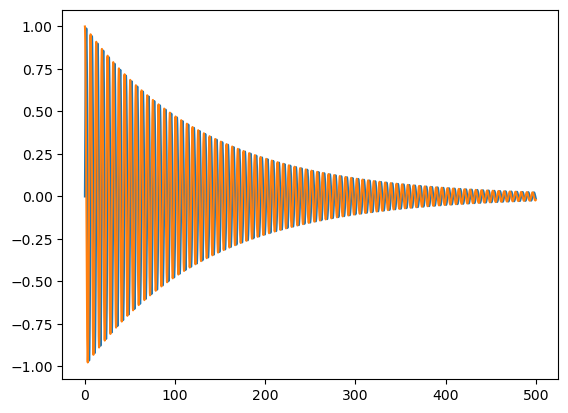

In [6]:
T =500.
h, y = forward_euler_integrate(100000, T)
PyPlot.plot(collect(0:h:T), y');


In [7]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of ColorTypes...
INFO: Updating cache of ReverseDiffSource...
INFO: Updating cache of FixedSizeArrays...
INFO: Updating cache of IJulia...
INFO: Updating cache of Clang...
INFO: Updating cache of ColorVectorSpace...
INFO: Updating cache of ProfileView...
INFO: Updating cache of UnicodePlots...
INFO: Updating cache of Interact...
INFO: Updating cache of Reactive...
INFO: Updating cache of Clang...
INFO: Updating JuliaParser...
INFO: Updating ProfileView...
INFO: Updating DGFun...
INFO: Computing changes...

LoadError: LoadError: AbstractTrees can't be installed because it has no versions that support 0.4.5 of julia. You may need to update METADATA by running `Pkg.update()`
while loading In[7], in expression starting on line 1